# PART II: Implementation TASK

importing necessary library for the assignment

In [126]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
import torch.optim as optim 
import time

# Task1 - Data Preparation

In [127]:
dataset_local = torchvision.datasets.ImageFolder('notMNIST_small', 
                                                transform = transforms.Compose(
                                                                            [transforms.ToTensor(),
                                                                             transforms.Normalize((0.5,),
                                                                                                  (0.5,))]))
dataloader_local = torch.utils.data.DataLoader(dataset_local, batch_size=4, shuffle=True, num_workers=2)

In [128]:
classes = ('A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Ground Truth D E B C


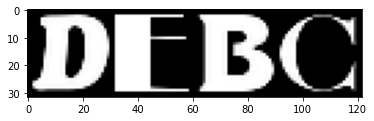

In [129]:
dataiter = iter(dataloader_local)
images, labels = dataiter.next()
plt.imshow(np.transpose(torchvision.utils.make_grid(images).numpy(), (1,2,0)))
print("Ground Truth", ' '.join('%s' % classes[labels[j]] for j in range(4)))

In [130]:
torch.manual_seed(1)
torch.cuda.manual_seed(1)
np.random.seed(1)
train = [idx for idx in torch.utils.data.RandomSampler(dataset_local)][:15000]
validation = [idx for idx in torch.utils.data.RandomSampler(dataset_local)][15000:16000]
test = [idx for idx in torch.utils.data.RandomSampler(dataset_local)][16000:]
x_train_dataset = []
y_train_dataset = []
x_validation_dataset = []
y_validation_dataset = []
x_test_dataset = []
y_test_dataset = []

for i in train:
    if i == 1257:
        continue
    x_train_dataset.append(dataset_local[i][0].numpy())
    y_train_dataset.append(np.array([dataset_local[i][1]]))
for i in validation:
    x_validation_dataset.append(dataset_local[i][0].numpy())
    y_validation_dataset.append(np.array([dataset_local[i][1]]))
for i in test:
    x_test_dataset.append(dataset_local[i][0].numpy())
    y_test_dataset.append(np.array([dataset_local[i][1]]))


In [131]:
trainDataset = torch.utils.data.TensorDataset(torch.FloatTensor(x_train_dataset), torch.LongTensor(y_train_dataset))
validationDatset = torch.utils.data.TensorDataset(torch.FloatTensor(x_validation_dataset), torch.LongTensor(y_validation_dataset))
testDataset = torch.utils.data.TensorDataset(torch.FloatTensor(x_test_dataset), torch.LongTensor(y_test_dataset))


trainLoader  = torch.utils.data.DataLoader(dataset = trainDataset, batch_size=100, num_workers=1)
validationLoader  = torch.utils.data.DataLoader(dataset = validationDatset, batch_size=100, num_workers=1)
testLoader = torch.utils.data.DataLoader(dataset = testDataset, batch_size=100, shuffle=False, num_workers=1)


# Task II - Neural Network Training (25 marks):

In [132]:
class SNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28*3, 1000)
        self.fc2 = nn.Linear(1000, 10)
        self.relu = nn.ReLU()
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.softmax(x)
        return x 

In [133]:
def load_model(lr):
    net = SNN()
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(net.parameters(), lr)
    return net, criterion, optimizer

In [134]:
# Using code -> from pytorchtools import EarlyStopping
# I used the code directly from the source code since I was not able to import it
import numpy as np
import torch

class EarlyStopping:
    """Early stops the training if validation loss doesn't improve after a given patience."""
    def __init__(self, patience=7, verbose=False, delta=0, path='checkpoint.pt', trace_func=print):
        """
        Args:
            patience (int): How long to wait after last time validation loss improved.
                            Default: 7
            verbose (bool): If True, prints a message for each validation loss improvement. 
                            Default: False
            delta (float): Minimum change in the monitored quantity to qualify as an improvement.
                            Default: 0
            path (str): Path for the checkpoint to be saved to.
                            Default: 'checkpoint.pt'
            trace_func (function): trace print function.
                            Default: print            
        """
        self.patience = patience
        self.verbose = verbose
        self.counter = 0
        self.best_score = None
        self.early_stop = False
        self.val_loss_min = np.Inf
        self.delta = delta
        self.path = path
        self.trace_func = trace_func
    def __call__(self, val_loss, model):

        score = -val_loss

        if self.best_score is None:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
        elif score < self.best_score + self.delta:
            self.counter += 1
            self.trace_func(f'EarlyStopping counter: {self.counter} out of {self.patience}')
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
            self.counter = 0

    def save_checkpoint(self, val_loss, model):
        '''Saves model when validation loss decrease.'''
        if self.verbose:
            self.trace_func(f'Validation loss decreased ({self.val_loss_min:.6f} --> {val_loss:.6f}).  Saving model ...')
        torch.save(model.state_dict(), self.path)
        self.val_loss_min = val_loss



Training loss: 2.2855285580952964
Validation loss decreased (inf --> 2.263526).  Saving model ...
Training loss: 2.2278530104955037
Validation loss decreased (inf --> 2.184058).  Saving model ...
Training loss: 2.12489261786143
Validation loss decreased (inf --> 2.067452).  Saving model ...
Training loss: 2.009773952166239
Validation loss decreased (inf --> 1.959527).  Saving model ...
Training loss: 1.9164653754234313
Validation loss decreased (inf --> 1.875700).  Saving model ...
Training loss: 1.8385619060198466
Validation loss decreased (inf --> 1.803307).  Saving model ...
Training loss: 1.7781311901410422
Validation loss decreased (inf --> 1.754516).  Saving model ...
Training loss: 1.7384886900583902
Validation loss decreased (inf --> 1.721859).  Saving model ...
Training loss: 1.7115354204177857
Validation loss decreased (inf --> 1.698922).  Saving model ...
Training loss: 1.6922832496960958
Validation loss decreased (inf --> 1.682085).  Saving model ...
Training loss: 1.677914

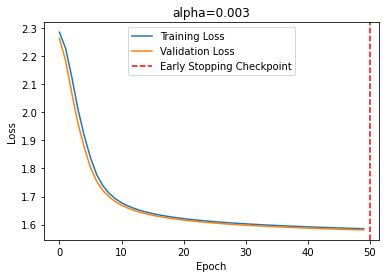

1.5853518390655517
1.5811322927474976


In [135]:
## When alpha = 0.003
alpha = 0.003
epochs = 50
seed = 0
model, criterion, optimizer = load_model(alpha)
lossRec = []
varlossRec = []
nRec = []   
timeRec = []

torch.manual_seed(seed)

for e in range(epochs):
    running_loss = 0
    v_running_loss = 0
    batch_cnt = 0
    v_batch_cnt = 0 

    early_stopping = EarlyStopping(patience = 7, verbose = True)

    for images, labels in trainLoader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
        batch_cnt+=1
        # Training pass
        optimizer.zero_grad()
        output = model(images)
        loss = criterion(output.squeeze(), labels.squeeze())
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss/len(trainLoader)}")
    
    with torch.no_grad():
        for v_image, v_labels in validationLoader:
            v_image = v_image.view(v_image.shape[0], -1)
            v_batch_cnt += 1 
            optimizer.zero_grad()
            outputs_v = model(v_image)
            loss_v = criterion(outputs_v.squeeze(), v_labels.squeeze())
            v_running_loss += loss_v.item()
            
    
    nRec.append(e)
    lossRec.append(running_loss/batch_cnt)
    varlossRec.append(v_running_loss/v_batch_cnt)
    timeRec.append(time.time())

    early_stopping(v_running_loss/v_batch_cnt, model)
    if early_stopping.early_stop:
            print("Early stopping")
            break

plt.plot(nRec, lossRec, label="Training Loss")
plt.plot(nRec, varlossRec, label="Validation Loss")

minposs = varlossRec.index(min(varlossRec))+1
plt.axvline(minposs, linestyle='--', color='r',label='Early Stopping Checkpoint')

plt.title("alpha=0.003")
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()
print(lossRec[-1]) #Train loss
print(varlossRec[-1]) #validation loss


In [136]:
#Test loss
model.eval()
test_loss = 0.0
num_test = 0.0
t_running_loss = 0.0
for t_image, t_labels in testLoader:
    t_image = t_image.view(t_image.shape[0], -1)
    outputs_t = model(t_image)
    num_test+=1
    loss_t = criterion(outputs_t.squeeze(), t_labels.squeeze())
    t_running_loss += loss_t
test_loss = t_running_loss/num_test
print('Test Loss: {:.6f}\n'.format(test_loss))


Test Loss: 1.581616



Training loss: 2.2593942244847613
Validation loss decreased (inf --> 2.200590).  Saving model ...
Training loss: 2.0991302824020384
Validation loss decreased (inf --> 1.999314).  Saving model ...
Training loss: 1.9153385678927104
Validation loss decreased (inf --> 1.856007).  Saving model ...
Training loss: 1.799416565100352
Validation loss decreased (inf --> 1.758992).  Saving model ...
Training loss: 1.7310233775774637
Validation loss decreased (inf --> 1.708022).  Saving model ...
Training loss: 1.6939350183804829
Validation loss decreased (inf --> 1.678416).  Saving model ...
Training loss: 1.6713258639971416
Validation loss decreased (inf --> 1.659279).  Saving model ...
Training loss: 1.6561205768585205
Validation loss decreased (inf --> 1.645873).  Saving model ...
Training loss: 1.6451157093048097
Validation loss decreased (inf --> 1.635904).  Saving model ...
Training loss: 1.6367077922821045
Validation loss decreased (inf --> 1.628145).  Saving model ...
Training loss: 1.6300

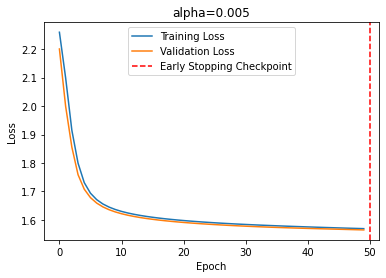

1.5694786429405212
1.56500985622406


In [137]:
## When alpha = 0.003
alpha = 0.005
epochs = 50
seed = 0
model, criterion, optimizer = load_model(alpha)
lossRec = []
varlossRec = []
nRec = []   
timeRec = []

torch.manual_seed(seed)

for e in range(epochs):
    running_loss = 0
    v_running_loss = 0
    batch_cnt = 0
    v_batch_cnt = 0 

    early_stopping = EarlyStopping(patience = 7, verbose = True)

    for images, labels in trainLoader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
        batch_cnt+=1
        # Training pass
        optimizer.zero_grad()
        output = model(images)
        loss = criterion(output.squeeze(), labels.squeeze())
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss/len(trainLoader)}")
    
    with torch.no_grad():
        for v_image, v_labels in validationLoader:
            v_image = v_image.view(v_image.shape[0], -1)
            v_batch_cnt += 1 
            optimizer.zero_grad()
            outputs_v = model(v_image)
            loss_v = criterion(outputs_v.squeeze(), v_labels.squeeze())
            v_running_loss += loss_v.item()
            
    
    nRec.append(e)
    lossRec.append(running_loss/batch_cnt)
    varlossRec.append(v_running_loss/v_batch_cnt)
    timeRec.append(time.time())

    early_stopping(v_running_loss/v_batch_cnt, model)
    if early_stopping.early_stop:
            print("Early stopping")
            break

plt.plot(nRec, lossRec, label="Training Loss")
plt.plot(nRec, varlossRec, label="Validation Loss")

minposs = varlossRec.index(min(varlossRec))+1
plt.axvline(minposs, linestyle='--', color='r',label='Early Stopping Checkpoint')

plt.title("alpha=0.005")
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()
print(lossRec[-1]) #Train loss
print(varlossRec[-1]) #validation loss


In [138]:
#Test loss
model.eval()
test_loss = 0.0
num_test = 0.0
t_running_loss = 0.0
for t_image, t_labels in testLoader:
    t_image = t_image.view(t_image.shape[0], -1)
    outputs_t = model(t_image)
    num_test+=1
    loss_t = criterion(outputs_t.squeeze(), t_labels.squeeze())
    t_running_loss += loss_t
test_loss = t_running_loss/num_test
print('Test Loss: {:.6f}\n'.format(test_loss))

Test Loss: 1.568158



Training loss: 2.181005589167277
Validation loss decreased (inf --> 2.000566).  Saving model ...
Training loss: 1.8587437844276429
Validation loss decreased (inf --> 1.759259).  Saving model ...
Training loss: 1.7130081168810527
Validation loss decreased (inf --> 1.678421).  Saving model ...
Training loss: 1.6640508755048116
Validation loss decreased (inf --> 1.645865).  Saving model ...
Training loss: 1.641198693116506
Validation loss decreased (inf --> 1.628138).  Saving model ...
Training loss: 1.627540086110433
Validation loss decreased (inf --> 1.616702).  Saving model ...
Training loss: 1.6181757609049479
Validation loss decreased (inf --> 1.608512).  Saving model ...
Training loss: 1.6111844277381897
Validation loss decreased (inf --> 1.602245).  Saving model ...
Training loss: 1.605657029946645
Validation loss decreased (inf --> 1.597230).  Saving model ...
Training loss: 1.6011062335968018
Validation loss decreased (inf --> 1.593073).  Saving model ...
Training loss: 1.5972486

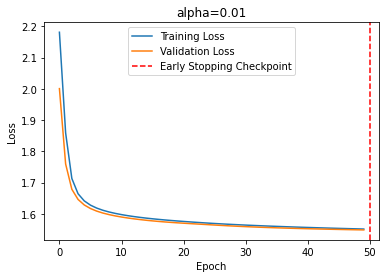

1.5510855555534362
1.5482874751091003


In [139]:
## When alpha = 0.01
alpha = 0.01
epochs = 50
seed = 0
model, criterion, optimizer = load_model(alpha)
lossRec = []
varlossRec = []
nRec = []   
timeRec = []

torch.manual_seed(seed)

for e in range(epochs):
    running_loss = 0
    v_running_loss = 0
    batch_cnt = 0
    v_batch_cnt = 0 

    early_stopping = EarlyStopping(patience = 7, verbose = True)

    for images, labels in trainLoader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
        batch_cnt+=1
        # Training pass
        optimizer.zero_grad()
        output = model(images)
        loss = criterion(output.squeeze(), labels.squeeze())
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss/len(trainLoader)}")
    
    with torch.no_grad():
        for v_image, v_labels in validationLoader:
            v_image = v_image.view(v_image.shape[0], -1)
            v_batch_cnt += 1 
            optimizer.zero_grad()
            outputs_v = model(v_image)
            loss_v = criterion(outputs_v.squeeze(), v_labels.squeeze())
            v_running_loss += loss_v.item()
            
    
    nRec.append(e)
    lossRec.append(running_loss/batch_cnt)
    varlossRec.append(v_running_loss/v_batch_cnt)
    timeRec.append(time.time())

    early_stopping(v_running_loss/v_batch_cnt, model)
    if early_stopping.early_stop:
            print("Early stopping")
            break

plt.plot(nRec, lossRec, label="Training Loss")
plt.plot(nRec, varlossRec, label="Validation Loss")

minposs = varlossRec.index(min(varlossRec))+1
plt.axvline(minposs, linestyle='--', color='r',label='Early Stopping Checkpoint')

plt.title("alpha=0.01")
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()
print(lossRec[-1]) #Train loss
print(varlossRec[-1]) #validation loss


In [140]:
#Test loss
model.eval()
test_loss = 0.0
num_test = 0.0
t_running_loss = 0.0
for t_image, t_labels in testLoader:
    t_image = t_image.view(t_image.shape[0], -1)
    outputs_t = model(t_image)
    num_test+=1
    loss_t = criterion(outputs_t.squeeze(), t_labels.squeeze())
    t_running_loss += loss_t
test_loss = t_running_loss/num_test
print('Test Loss: {:.6f}\n'.format(test_loss))


Test Loss: 1.552814



Training loss: 1.8168927772839865
Validation loss decreased (inf --> 1.628187).  Saving model ...
Training loss: 1.614474957784017
Validation loss decreased (inf --> 1.593067).  Saving model ...
Training loss: 1.5929615799585979
Validation loss decreased (inf --> 1.579185).  Saving model ...
Training loss: 1.5818282636006673
Validation loss decreased (inf --> 1.571068).  Saving model ...
Training loss: 1.5741884430249533
Validation loss decreased (inf --> 1.565138).  Saving model ...
Training loss: 1.5682002393404644
Validation loss decreased (inf --> 1.559905).  Saving model ...
Training loss: 1.563508656024933
Validation loss decreased (inf --> 1.555887).  Saving model ...
Training loss: 1.5596681722005208
Validation loss decreased (inf --> 1.552860).  Saving model ...
Training loss: 1.5564340662956238
Validation loss decreased (inf --> 1.550506).  Saving model ...
Training loss: 1.5536346777280172
Validation loss decreased (inf --> 1.548583).  Saving model ...
Training loss: 1.55115

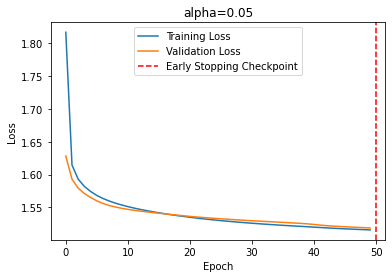

1.5156447474161785
1.5185910940170289


In [141]:
## When alpha = 0.05
alpha = 0.05
epochs = 50
seed = 0
model, criterion, optimizer = load_model(alpha)
import time
lossRec = []
varlossRec = []
nRec = []   
timeRec = []

torch.manual_seed(seed)

for e in range(epochs):
    running_loss = 0
    v_running_loss = 0
    batch_cnt = 0
    v_batch_cnt = 0 

    early_stopping = EarlyStopping(patience = 7, verbose = True)

    for images, labels in trainLoader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
        batch_cnt+=1
        # Training pass
        optimizer.zero_grad()
        output = model(images)
        loss = criterion(output.squeeze(), labels.squeeze())
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss/len(trainLoader)}")
    
    with torch.no_grad():
        for v_image, v_labels in validationLoader:
            v_image = v_image.view(v_image.shape[0], -1)
            v_batch_cnt += 1 
            optimizer.zero_grad()
            outputs_v = model(v_image)
            loss_v = criterion(outputs_v.squeeze(), v_labels.squeeze())
            v_running_loss += loss_v.item()
            
    
    nRec.append(e)
    lossRec.append(running_loss/batch_cnt)
    varlossRec.append(v_running_loss/v_batch_cnt)
    timeRec.append(time.time())

    early_stopping(v_running_loss/v_batch_cnt, model)
    if early_stopping.early_stop:
            print("Early stopping")
            break

plt.plot(nRec, lossRec, label="Training Loss")
plt.plot(nRec, varlossRec, label="Validation Loss")

minposs = varlossRec.index(min(varlossRec))+1
plt.axvline(minposs, linestyle='--', color='r',label='Early Stopping Checkpoint')

plt.title("alpha=0.05")
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()
print(lossRec[-1]) #Train loss
print(varlossRec[-1]) #validation loss


In [142]:
#Test loss
model.eval()
test_loss = 0.0
num_test = 0.0
t_running_loss = 0.0
for t_image, t_labels in testLoader:
    t_image = t_image.view(t_image.shape[0], -1)
    outputs_t = model(t_image)
    num_test+=1
    loss_t = criterion(outputs_t.squeeze(), t_labels.squeeze())
    t_running_loss += loss_t
test_loss = t_running_loss/num_test
print('Test Loss: {:.6f}\n'.format(test_loss))


Test Loss: 1.518972



Training loss: 1.7221400435765584
Validation loss decreased (inf --> 1.593807).  Saving model ...
Training loss: 1.5896101077397664
Validation loss decreased (inf --> 1.571605).  Saving model ...
Training loss: 1.5732409302393595
Validation loss decreased (inf --> 1.560838).  Saving model ...
Training loss: 1.5635332767168681
Validation loss decreased (inf --> 1.553644).  Saving model ...
Training loss: 1.5568880899747213
Validation loss decreased (inf --> 1.549061).  Saving model ...
Training loss: 1.5518608776728313
Validation loss decreased (inf --> 1.545965).  Saving model ...
Training loss: 1.5477789211273194
Validation loss decreased (inf --> 1.543628).  Saving model ...
Training loss: 1.5442955295244853
Validation loss decreased (inf --> 1.541575).  Saving model ...
Training loss: 1.5412394825617473
Validation loss decreased (inf --> 1.539614).  Saving model ...
Training loss: 1.5385259167353311
Validation loss decreased (inf --> 1.537801).  Saving model ...
Training loss: 1.536

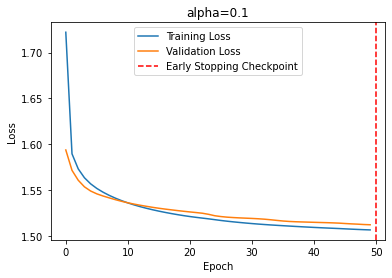

1.5066682839393615
1.5122920513153075


In [143]:
## When alpha = 0.1
alpha = 0.1
epochs = 50
seed = 0
model, criterion, optimizer = load_model(alpha)
import time
lossRec = []
varlossRec = []
nRec = []   
timeRec = []

torch.manual_seed(seed)

for e in range(epochs):
    running_loss = 0
    v_running_loss = 0
    batch_cnt = 0
    v_batch_cnt = 0 

    early_stopping = EarlyStopping(patience = 7, verbose = True)

    for images, labels in trainLoader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
        batch_cnt+=1
        # Training pass
        optimizer.zero_grad()
        output = model(images)
        loss = criterion(output.squeeze(), labels.squeeze())
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss/len(trainLoader)}")
    
    with torch.no_grad():
        for v_image, v_labels in validationLoader:
            v_image = v_image.view(v_image.shape[0], -1)
            v_batch_cnt += 1 
            optimizer.zero_grad()
            outputs_v = model(v_image)
            loss_v = criterion(outputs_v.squeeze(), v_labels.squeeze())
            v_running_loss += loss_v.item()
            
    
    nRec.append(e)
    lossRec.append(running_loss/batch_cnt)
    varlossRec.append(v_running_loss/v_batch_cnt)
    timeRec.append(time.time())

    early_stopping(v_running_loss/v_batch_cnt, model)
    if early_stopping.early_stop:
            print("Early stopping")
            break

plt.plot(nRec, lossRec, label="Training Loss")
plt.plot(nRec, varlossRec, label="Validation Loss")

minposs = varlossRec.index(min(varlossRec))+1
plt.axvline(minposs, linestyle='--', color='r',label='Early Stopping Checkpoint')

plt.title("alpha=0.1")
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()
print(lossRec[-1]) #Train loss
print(varlossRec[-1]) #validation loss


In [144]:
#Test loss
model.eval()
test_loss = 0.0
num_test = 0.0
t_running_loss = 0.0
for t_image, t_labels in testLoader:
    t_image = t_image.view(t_image.shape[0], -1)
    outputs_t = model(t_image)
    num_test+=1
    loss_t = criterion(outputs_t.squeeze(), t_labels.squeeze())
    t_running_loss += loss_t
test_loss = t_running_loss/num_test
print('Test Loss: {:.6f}\n'.format(test_loss))


Test Loss: 1.510421



Obervation: the data is less overfitted starting when learning rate is around 0.05 and also data reaches the minimum loss quicker with the learning rate around this value.

# Task III - Testing the Number of Hidden Units (25 marks):

In [145]:
class SNN2(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28*3, 100)
        self.fc2 = nn.Linear(100, 10)
        self.relu = nn.ReLU()
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.softmax(x)
        return x 

class SNN3(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28*3, 500)
        self.fc2 = nn.Linear(500, 10)
        self.relu = nn.ReLU()
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.softmax(x)
        return x 
        
class SNN4(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28*3, 1000)
        self.fc2 = nn.Linear(1000, 10)
        self.relu = nn.ReLU()
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.softmax(x)
        return x 

In [146]:
def load_model2(lr):
    net = SNN2()
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(net.parameters(), lr)
    return net, criterion, optimizer
def load_model3(lr):
    net = SNN3()
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(net.parameters(), lr)
    return net, criterion, optimizer
def load_model4(lr):
    net = SNN4()
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(net.parameters(), lr)
    return net, criterion, optimizer

Training loss: 2.2130413834253946
Validation loss decreased (inf --> 2.057395).  Saving model ...
Training loss: 1.8992188501358032
Validation loss decreased (inf --> 1.780993).  Saving model ...
Training loss: 1.7280770285924276
Validation loss decreased (inf --> 1.688225).  Saving model ...
Training loss: 1.6718641344706218
Validation loss decreased (inf --> 1.652180).  Saving model ...
Training loss: 1.646504645347595
Validation loss decreased (inf --> 1.633119).  Saving model ...
Training loss: 1.6316192483901977
Validation loss decreased (inf --> 1.621037).  Saving model ...
Training loss: 1.6215402388572693
Validation loss decreased (inf --> 1.612481).  Saving model ...
Training loss: 1.6141113313039144
Validation loss decreased (inf --> 1.605974).  Saving model ...
Training loss: 1.6083044743537902
Validation loss decreased (inf --> 1.600785).  Saving model ...
Training loss: 1.6035695258776348
Validation loss decreased (inf --> 1.596498).  Saving model ...
Training loss: 1.5995

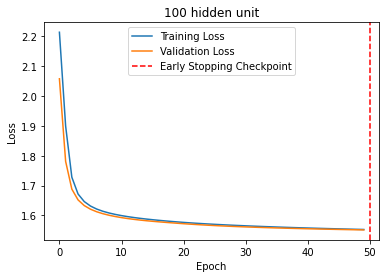

1.5531887245178222
1.5517399907112122


In [147]:
alpha = 0.01
epochs = 50
seed = 0
model2, criterion, optimizer = load_model2(alpha)
lossRec = []
varlossRec = []
nRec = []   
timeRec = []

torch.manual_seed(seed)

for e in range(epochs):
    running_loss = 0
    v_running_loss = 0
    batch_cnt = 0
    v_batch_cnt = 0 

    early_stopping = EarlyStopping(patience = 7, verbose = True)

    for images, labels in trainLoader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
        batch_cnt+=1
        # Training pass
        optimizer.zero_grad()
        output = model2(images)
        loss = criterion(output.squeeze(), labels.squeeze())
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss/len(trainLoader)}")
    
    with torch.no_grad():
        for v_image, v_labels in validationLoader:
            v_image = v_image.view(v_image.shape[0], -1)
            v_batch_cnt += 1 
            optimizer.zero_grad()
            outputs_v = model2(v_image)
            loss_v = criterion(outputs_v.squeeze(), v_labels.squeeze())
            v_running_loss += loss_v.item()
            
    
    nRec.append(e)
    lossRec.append(running_loss/batch_cnt)
    varlossRec.append(v_running_loss/v_batch_cnt)
    timeRec.append(time.time())

    early_stopping(v_running_loss/v_batch_cnt, model2)
    if early_stopping.early_stop:
            print("Early stopping")
            break

plt.plot(nRec, lossRec, label="Training Loss")
plt.plot(nRec, varlossRec, label="Validation Loss")

minposs = varlossRec.index(min(varlossRec))+1
plt.axvline(minposs, linestyle='--', color='r',label='Early Stopping Checkpoint')

plt.title("100 hidden unit")
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()
print(lossRec[-1]) #Train loss
print(varlossRec[-1]) #validation loss

In [148]:
#Test loss
model2.eval()
test_loss = 0.0
num_test = 0.0
t_running_loss = 0.0
for t_image, t_labels in testLoader:
    t_image = t_image.view(t_image.shape[0], -1)
    outputs_t = model2(t_image)
    num_test+=1
    loss_t = criterion(outputs_t.squeeze(), t_labels.squeeze())
    t_running_loss += loss_t
test_loss = t_running_loss/num_test
print('Test Loss: {:.6f}\n'.format(test_loss))


Test Loss: 1.554810



Training loss: 2.2130774974823
Validation loss decreased (inf --> 2.060644).  Saving model ...
Training loss: 1.8993440794944763
Validation loss decreased (inf --> 1.784194).  Saving model ...
Training loss: 1.7258010220527649
Validation loss decreased (inf --> 1.687022).  Saving model ...
Training loss: 1.6695747979482014
Validation loss decreased (inf --> 1.651495).  Saving model ...
Training loss: 1.6448125187555949
Validation loss decreased (inf --> 1.632552).  Saving model ...
Training loss: 1.6303546659151713
Validation loss decreased (inf --> 1.620445).  Saving model ...
Training loss: 1.6205769205093383
Validation loss decreased (inf --> 1.611806).  Saving model ...
Training loss: 1.6133470114072164
Validation loss decreased (inf --> 1.605209).  Saving model ...
Training loss: 1.6076711853345236
Validation loss decreased (inf --> 1.599937).  Saving model ...
Training loss: 1.6030133660634358
Validation loss decreased (inf --> 1.595585).  Saving model ...
Training loss: 1.599064

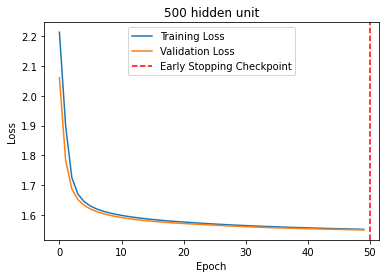

1.5522894740104676
1.550346553325653


In [149]:
alpha = 0.01
epochs = 50
seed = 0
model3, criterion, optimizer = load_model3(alpha)
lossRec = []
varlossRec = []
nRec = []   
timeRec = []

torch.manual_seed(seed)

for e in range(epochs):
    running_loss = 0
    v_running_loss = 0
    batch_cnt = 0
    v_batch_cnt = 0 

    early_stopping = EarlyStopping(patience = 7, verbose = True)

    for images, labels in trainLoader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
        batch_cnt+=1
        # Training pass
        optimizer.zero_grad()
        output = model3(images)
        loss = criterion(output.squeeze(), labels.squeeze())
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss/len(trainLoader)}")
    
    with torch.no_grad():
        for v_image, v_labels in validationLoader:
            v_image = v_image.view(v_image.shape[0], -1)
            v_batch_cnt += 1 
            optimizer.zero_grad()
            outputs_v = model3(v_image)
            loss_v = criterion(outputs_v.squeeze(), v_labels.squeeze())
            v_running_loss += loss_v.item()
            
    
    nRec.append(e)
    lossRec.append(running_loss/batch_cnt)
    varlossRec.append(v_running_loss/v_batch_cnt)
    timeRec.append(time.time())

    early_stopping(v_running_loss/v_batch_cnt, model3)
    if early_stopping.early_stop:
            print("Early stopping")
            break

plt.plot(nRec, lossRec, label="Training Loss")
plt.plot(nRec, varlossRec, label="Validation Loss")

minposs = varlossRec.index(min(varlossRec))+1
plt.axvline(minposs, linestyle='--', color='r',label='Early Stopping Checkpoint')

plt.title("500 hidden unit")
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()
print(lossRec[-1]) #Train loss
print(varlossRec[-1]) #validation loss

In [150]:
#Test loss
model3.eval()
test_loss = 0.0
num_test = 0.0
t_running_loss = 0.0
for t_image, t_labels in testLoader:
    t_image = t_image.view(t_image.shape[0], -1)
    outputs_t = model3(t_image)
    num_test+=1
    loss_t = criterion(outputs_t.squeeze(), t_labels.squeeze())
    t_running_loss += loss_t
test_loss = t_running_loss/num_test
print('Test Loss: {:.6f}\n'.format(test_loss))


Test Loss: 1.553071



Training loss: 2.181005589167277
Validation loss decreased (inf --> 2.000566).  Saving model ...
Training loss: 1.8587437844276429
Validation loss decreased (inf --> 1.759259).  Saving model ...
Training loss: 1.7130081168810527
Validation loss decreased (inf --> 1.678421).  Saving model ...
Training loss: 1.6640508755048116
Validation loss decreased (inf --> 1.645865).  Saving model ...
Training loss: 1.641198693116506
Validation loss decreased (inf --> 1.628138).  Saving model ...
Training loss: 1.627540086110433
Validation loss decreased (inf --> 1.616702).  Saving model ...
Training loss: 1.6181757609049479
Validation loss decreased (inf --> 1.608512).  Saving model ...
Training loss: 1.6111844277381897
Validation loss decreased (inf --> 1.602245).  Saving model ...
Training loss: 1.605657029946645
Validation loss decreased (inf --> 1.597230).  Saving model ...
Training loss: 1.6011062335968018
Validation loss decreased (inf --> 1.593073).  Saving model ...
Training loss: 1.5972486

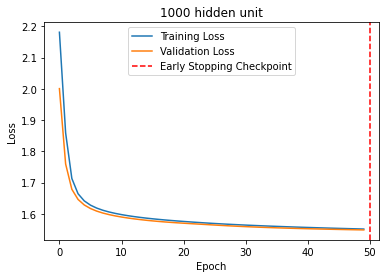

1.5510855555534362
1.5482874751091003


In [151]:
alpha = 0.01
epochs = 50
seed = 0
model4, criterion, optimizer = load_model4(alpha)
lossRec = []
varlossRec = []
nRec = []   
timeRec = []

torch.manual_seed(seed)

for e in range(epochs):
    running_loss = 0
    v_running_loss = 0
    batch_cnt = 0
    v_batch_cnt = 0 

    early_stopping = EarlyStopping(patience = 7, verbose = True)

    for images, labels in trainLoader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
        batch_cnt+=1
        # Training pass
        optimizer.zero_grad()
        output = model4(images)
        loss = criterion(output.squeeze(), labels.squeeze())
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss/len(trainLoader)}")
    
    with torch.no_grad():
        for v_image, v_labels in validationLoader:
            v_image = v_image.view(v_image.shape[0], -1)
            v_batch_cnt += 1 
            optimizer.zero_grad()
            outputs_v = model4(v_image)
            loss_v = criterion(outputs_v.squeeze(), v_labels.squeeze())
            v_running_loss += loss_v.item()
            
    
    nRec.append(e)
    lossRec.append(running_loss/batch_cnt)
    varlossRec.append(v_running_loss/v_batch_cnt)
    timeRec.append(time.time())

    early_stopping(v_running_loss/v_batch_cnt, model4)
    if early_stopping.early_stop:
            print("Early stopping")
            break

plt.plot(nRec, lossRec, label="Training Loss")
plt.plot(nRec, varlossRec, label="Validation Loss")

minposs = varlossRec.index(min(varlossRec))+1
plt.axvline(minposs, linestyle='--', color='r',label='Early Stopping Checkpoint')

plt.title("1000 hidden unit")
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()
print(lossRec[-1]) #Train loss
print(varlossRec[-1]) #validation loss

In [152]:
#Test loss
model4.eval()
test_loss = 0.0
num_test = 0.0

t_running_loss = 0.0
for t_image, t_labels in testLoader:
    t_image = t_image.view(t_image.shape[0], -1)
    outputs_t = model4(t_image)
    num_test+=1
    loss_t = criterion(outputs_t.squeeze(), t_labels.squeeze())
    t_running_loss += loss_t
test_loss = t_running_loss/num_test
print('Test Loss: {:.6f}\n'.format(test_loss))


Test Loss: 1.552814



<ipython-input-153-629db365ad6a>:9: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats

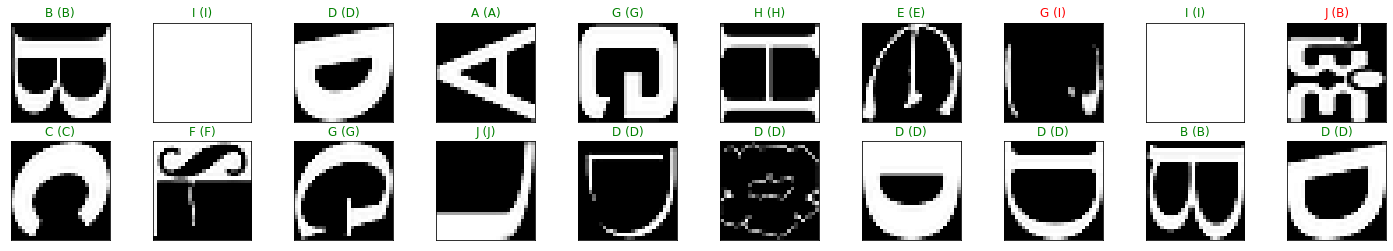

In [153]:
dataiter = iter(testLoader)
images, labels = dataiter.next()
images2 = images.view(images.shape[0], -1)
model3.eval()
outputs_t = model3(images2)
_, preds = torch.max(outputs_t, 1)
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx].T), cmap='gray')
    ax.set_title("{} ({})".format(str(classes[preds[idx].item()]), str(classes[labels[idx].item()])),
                 color=("green" if preds[idx]==labels[idx] else "red"))

When hidden units are 500, the loss after 50 epoch has been minized. This shows that either too small or large number of layers does not have correlation with the result of NN.

# Task IV - Testing the Number of Layers (25 marks):

In [154]:
class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28*3, 500)
        self.fc2 = nn.Linear(500, 500)
        self.fc3 = nn.Linear(500, 10)
        self.relu = nn.ReLU()
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        x = self.softmax(x)
        return x 

In [155]:
def load_model5(lr):
    net = MLP()
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(net.parameters(), lr)
    return net, criterion, optimizer

Training loss: 2.2958771896362307
Validation loss decreased (inf --> 2.288181).  Saving model ...
Training loss: 2.276225158373515
Validation loss decreased (inf --> 2.260999).  Saving model ...
Training loss: 2.225175773302714
Validation loss decreased (inf --> 2.169616).  Saving model ...
Training loss: 2.0853132104873655
Validation loss decreased (inf --> 2.012571).  Saving model ...
Training loss: 1.9508160217603048
Validation loss decreased (inf --> 1.910475).  Saving model ...
Training loss: 1.8451425909996033
Validation loss decreased (inf --> 1.808545).  Saving model ...
Training loss: 1.763903213342031
Validation loss decreased (inf --> 1.751959).  Saving model ...
Training loss: 1.7186936783790587
Validation loss decreased (inf --> 1.686429).  Saving model ...
Training loss: 1.6642463143666586
Validation loss decreased (inf --> 1.645344).  Saving model ...
Training loss: 1.6387910318374634
Validation loss decreased (inf --> 1.625845).  Saving model ...
Training loss: 1.624395

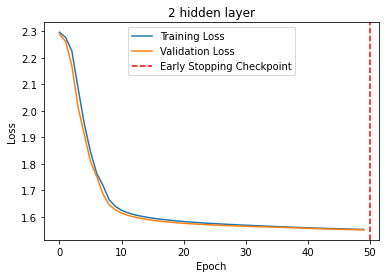

1.5520249064763387
1.5502662658691406


In [156]:
alpha = 0.01
epochs = 50
seed = 0
model5, criterion, optimizer = load_model5(alpha)
lossRec = []
varlossRec = []
nRec = []   
timeRec = []

torch.manual_seed(seed)

for e in range(epochs):
    running_loss = 0
    v_running_loss = 0
    batch_cnt = 0
    v_batch_cnt = 0 

    early_stopping = EarlyStopping(patience = 7, verbose = True)

    for images, labels in trainLoader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
        batch_cnt+=1
        # Training pass
        optimizer.zero_grad()
        output = model5(images)
        loss = criterion(output.squeeze(), labels.squeeze())
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss/len(trainLoader)}")
    
    with torch.no_grad():
        for v_image, v_labels in validationLoader:
            v_image = v_image.view(v_image.shape[0], -1)
            v_batch_cnt += 1 
            optimizer.zero_grad()
            outputs_v = model5(v_image)
            loss_v = criterion(outputs_v.squeeze(), v_labels.squeeze())
            v_running_loss += loss_v.item()
            
    
    nRec.append(e)
    lossRec.append(running_loss/batch_cnt)
    varlossRec.append(v_running_loss/v_batch_cnt)
    timeRec.append(time.time())

    early_stopping(v_running_loss/v_batch_cnt, model5)
    if early_stopping.early_stop:
            print("Early stopping")
            break

plt.plot(nRec, lossRec, label="Training Loss")
plt.plot(nRec, varlossRec, label="Validation Loss")

minposs = varlossRec.index(min(varlossRec))+1
plt.axvline(minposs, linestyle='--', color='r',label='Early Stopping Checkpoint')

plt.title("2 hidden layer")
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()
print(lossRec[-1]) #Train loss
print(varlossRec[-1]) #validation loss

In [157]:
#Test loss
model5.eval()
test_loss = 0.0
num_test = 0.0
t_running_loss = 0.0
for t_image, t_labels in testLoader:
    t_image = t_image.view(t_image.shape[0], -1)
    outputs_t = model5(t_image)
    num_test+=1
    loss_t = criterion(outputs_t.squeeze(), t_labels.squeeze())
    t_running_loss += loss_t
test_loss = t_running_loss/num_test
print('Test Loss: {:.6f}\n'.format(test_loss))

Test Loss: 1.553015



Compared to the one-layercase, the graph tends to be looking like logistic function with more overfitted datas.

#  Task V - Dropout (30 marks):

In [158]:
class SNN6(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28*3, 1000)
        self.fc2 = nn.Linear(1000, 10)
        self.relu = nn.ReLU()
        self.softmax = nn.Softmax(dim=1)
        self.dropout = nn.Dropout(0.5)
        

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc2(x)
        x = self.dropout(x)
        
        x = self.softmax(x)
        return x 
        


In [159]:
def load_model6(lr):
    net = SNN6()
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(net.parameters(), lr)
    return net, criterion, optimizer

Training loss: 2.1766559267044068
Validation loss decreased (inf --> 2.070105).  Saving model ...
Training loss: 2.0298939124743143
Validation loss decreased (inf --> 2.001570).  Saving model ...
Training loss: 1.9937926038106282
Validation loss decreased (inf --> 1.998897).  Saving model ...
Training loss: 1.9782878931363423
Validation loss decreased (inf --> 1.944852).  Saving model ...
Training loss: 1.965030992825826
Validation loss decreased (inf --> 1.963637).  Saving model ...
Training loss: 1.9561847201983134
Validation loss decreased (inf --> 1.926845).  Saving model ...
Training loss: 1.9423652561505635
Validation loss decreased (inf --> 1.953238).  Saving model ...
Training loss: 1.9438869428634644
Validation loss decreased (inf --> 1.958441).  Saving model ...
Training loss: 1.9317857313156128
Validation loss decreased (inf --> 1.927873).  Saving model ...
Training loss: 1.92953684091568
Validation loss decreased (inf --> 1.926002).  Saving model ...
Training loss: 1.937530

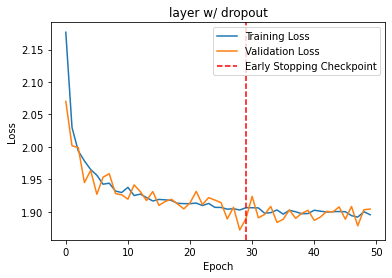

1.8952134235699971
1.9040672779083252


In [160]:
alpha = 0.01
epochs = 50
seed = 0
model6, criterion, optimizer = load_model6(alpha)
lossRec = []
varlossRec = []
nRec = []   
timeRec = []

torch.manual_seed(seed)

for e in range(epochs):
    running_loss = 0
    v_running_loss = 0
    batch_cnt = 0
    v_batch_cnt = 0 

    early_stopping = EarlyStopping(patience = 7, verbose = True)

    for images, labels in trainLoader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
        batch_cnt+=1
        # Training pass
        optimizer.zero_grad()
        output = model6(images)
        loss = criterion(output.squeeze(), labels.squeeze())
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss/len(trainLoader)}")
    
    with torch.no_grad():
        for v_image, v_labels in validationLoader:
            v_image = v_image.view(v_image.shape[0], -1)
            v_batch_cnt += 1 
            optimizer.zero_grad()
            outputs_v = model6(v_image)
            loss_v = criterion(outputs_v.squeeze(), v_labels.squeeze())
            v_running_loss += loss_v.item()
            
    
    nRec.append(e)
    lossRec.append(running_loss/batch_cnt)
    varlossRec.append(v_running_loss/v_batch_cnt)
    timeRec.append(time.time())

    early_stopping(v_running_loss/v_batch_cnt, model6)
    if early_stopping.early_stop:
            print("Early stopping")
            break

plt.plot(nRec, lossRec, label="Training Loss")
plt.plot(nRec, varlossRec, label="Validation Loss")

minposs = varlossRec.index(min(varlossRec))+1
plt.axvline(minposs, linestyle='--', color='r',label='Early Stopping Checkpoint')

plt.title("layer w/ dropout")
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()
print(lossRec[-1]) #Train loss
print(varlossRec[-1]) #validation loss

As seen from the result graph of using dropout, it definitely reaches the minimum loss within small epoch compared to any of the previous network in this assignment without the use of dropout.